In [1]:
# Step 1: Load and inspect dataset
import pandas as pd

# Load your dataset
df = pd.read_csv("final_dataset.csv")

# Show basic info
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully!
Shape: (1948, 48)


,Price,Bedroom,Bathroom,Floors,Neighborhood_encoded,Has_Air_condition,Has_Backyard,Has_Balcony,Has_Cafeteria,Has_Cctv,...,Area_Aana,City_encoded,Face_encoded,Road Type_encoded,Price_per_Aana,Total_Rooms,Amenity_Count,Is_Luxury_House,Mean_Neigh_Price,Log_Price
0,18.315320,6,3,2.0,64,0,1,1,0,0,...,16.00,9,7,1,1.144708,9,16,0,16.114045,2.960899
1,18.197537,5,3,2.0,64,0,1,1,0,0,...,21.00,9,0,1,0.866549,8,15,0,16.114045,2.954782
2,18.064006,5,3,2.0,98,0,1,1,0,0,...,17.00,9,0,1,1.062589,8,16,0,15.999924,2.947802
3,18.683045,6,4,3.0,31,0,1,1,0,0,...,10.25,9,7,1,1.822736,10,16,0,15.676899,2.979758
4,18.420681,6,3,2.0,124,0,1,1,0,0,...,19.50,9,0,1,0.944650,9,16,0,16.647259,2.966339


In [1]:

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("final_model_ready_data.csv")  

# Check the first few rows to understand the data
print(df.head())

# Check columns and datatypes
print(df.info())

# Check summary statistics of Price column
print(df['Price'].describe())


       Price  Bedroom  Bathroom  Floors  Neighborhood_encoded  \
0  18.315320        6         3     2.0                    64   
1  18.197537        5         3     2.0                    64   
2  18.064006        5         3     2.0                    98   
3  18.683045        6         4     3.0                    31   
4  18.420681        6         3     2.0                   124   

   Has_Air_condition  Has_Backyard  Has_Balcony  Has_Cafeteria  Has_Cctv  ...  \
0                  0             1            1              0         0  ...   
1                  0             1            1              0         0  ...   
2                  0             1            1              0         0  ...   
3                  0             1            1              0         0  ...   
4                  0             1            1              0         0  ...   

   Has_Tv_cable  Has_Washing_machine  Has_Water_supply  Has_Water_tank  \
0             1                    0            

In [5]:
# Add log transformed price column
df['Log_Price'] = np.log1p(df['Price'])

# Show summary statistics for Log_Price
print(df['Log_Price'].describe())


count    1948.000000
mean        2.782718
std         0.176679
min         1.327761
25%         2.720445
50%         2.841559
75%         2.898545
max         3.526546
Name: Log_Price, dtype: float64


In [2]:
# Define features (exclude Price and Log_Price)
feature_cols = df.columns.drop(['Price', 'Log_Price'])

X = df[feature_cols]
y = df['Log_Price']


In [7]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test (you can adjust)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Create the model object
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² score: 0.1975
Mean Absolute Error (MAE): 0.0953
Root Mean Squared Error (RMSE): 0.1417


In [2]:
import numpy as np

# Pick a price from your CSV (say 18.31532)
price = 18.31532
log_price = np.log1p(price)

print("Calculated Log_Price:", log_price)  # Should match ~2.96089


Calculated Log_Price: 2.9608985634156424


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('house_data_feature_engineeredmain.csv')


In [3]:
print(df.columns.tolist())


['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded', 'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria', 'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup', 'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym', 'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground', 'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave', 'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff', 'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool', 'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply', 'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana', 'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Price_per_Aana', 'Total_Rooms', 'Amenity_Count', 'Is_Luxury_House', 'Mean_Neigh_Price', 'Log_Price']


In [4]:
import numpy as np

df['Log_Price'] = np.log1p(df['Price'])


In [9]:
# Step 0: Drop any leakage features
df = df.drop(columns=['Price', 'Price_per_Aana','Mean_Neigh_Price'], errors='ignore')


In [20]:
# Step 1: Target
y = df['Log_Price']

# Step 2: Input features
X = df.drop(columns=['Log_Price'])


In [21]:
print(X.columns)
print(f"✅ Total features: {len(X.columns)}")


Index(['Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded',
       'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria',
       'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup',
       'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym',
       'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground',
       'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave',
       'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff',
       'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool',
       'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply',
       'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana',
       'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Total_Rooms',
       'Amenity_Count', 'Is_Luxury_House'],
      dtype='object')
✅ Total features: 44


In [22]:
print("✅ All numeric:", X.dtypes.unique())
print("❓ Any missing values:", X.isnull().sum().sum())
print("📊 X shape:", X.shape)
print("🎯 y shape:", y.shape)


✅ All numeric: [dtype('int64') dtype('float64')]
❓ Any missing values: 0
📊 X shape: (1948, 44)
🎯 y shape: (1948,)


In [23]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("🧪 X_train:", X_train.shape)
print("🧪 X_test:", X_test.shape)
print("🎯 y_train:", y_train.shape)
print("🎯 y_test:", y_test.shape)


🧪 X_train: (1558, 44)
🧪 X_test: (390, 44)
🎯 y_train: (1558,)
🎯 y_test: (390,)


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

print("✅ Model training completed!")


✅ Model training completed!


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Predict log prices
log_price_pred = model.predict(X_test)

# Convert log prices back to actual prices
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 RMSE: Rs. {rmse:,.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Show a few example predictions
for i in range(5):
    print(f"🏠 Predicted: Rs. {price_pred[i]:,.0f}  |  Actual: Rs. {price_actual.values[i]:,.0f}")


📉 RMSE: Rs. 2.21
📈 R² Score: 0.1659
🏠 Predicted: Rs. 16  |  Actual: Rs. 17
🏠 Predicted: Rs. 14  |  Actual: Rs. 10
🏠 Predicted: Rs. 15  |  Actual: Rs. 15
🏠 Predicted: Rs. 14  |  Actual: Rs. 10
🏠 Predicted: Rs. 17  |  Actual: Rs. 17


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples at leaf node
    'max_features': ['auto', 'sqrt']           # Number of features considered for best split
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                  # 3-fold cross-validation
    n_jobs=-1,             # Use all CPU cores
    verbose=2,
    scoring='neg_mean_squared_error'  # Minimize MSE
)

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python31

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score (negative MSE): -0.025164991602205467


In [ ]:
best_model = grid_search.best_estimator_

# Predict on test set
log_price_pred = best_model.predict(X_test)

# Convert back from log scale
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 Tuned RMSE: Rs. {rmse:,.2f}")
print(f"📈 Tuned R² Score: {r2:.4f}")


In [31]:
from sklearn.ensemble import RandomForestRegressor

best_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 42,
    'n_jobs': -1
}

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict and evaluate as before
log_price_pred = best_model.predict(X_test)
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 Tuned RMSE: Rs. {rmse:,.2f}")
print(f"📈 Tuned R² Score: {r2:.4f}")


📉 Tuned RMSE: Rs. 2.11
📈 Tuned R² Score: 0.2409


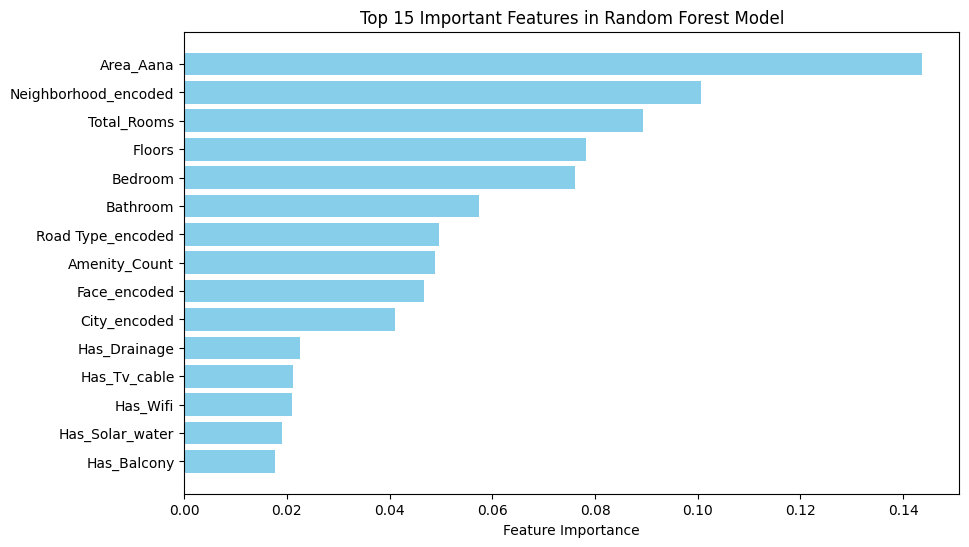

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming best_model is your tuned Random Forest model

# Get feature importances
importances = best_model.feature_importances_

# Get feature names (columns of X_train)
feature_names = X_train.columns

# Create a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features in Random Forest Model')
plt.show()


In [33]:
import pandas as pd

# Assuming best_model is your trained Random Forest
importances = best_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance')

print(feat_imp_df)


                   Feature  Importance
19             Has_Jacuzzi    0.000051
7            Has_Cafeteria    0.000171
23         Has_Maintenance    0.000198
17            Has_Intercom    0.000548
43         Is_Luxury_House    0.000793
27      Has_Security_staff    0.000849
8                 Has_Cctv    0.001419
16                 Has_Gym    0.001423
32     Has_Washing_machine    0.002544
30       Has_Swimming_pool    0.002757
20     Has_Kids_playground    0.002959
29          Has_Store_room    0.003222
24           Has_Microwave    0.004054
21                Has_Lawn    0.004633
11  Has_Electricity_backup    0.004990
4        Has_Air_condition    0.005357
18            Has_Internet    0.006447
9                 Has_Deck    0.007447
35          Has_Water_well    0.007722
26             Has_Parking    0.008974
5             Has_Backyard    0.009076
22                Has_Lift    0.009441
25     Has_Modular_kitchen    0.009860
12             Has_Fencing    0.010564
13           Has_Frontyar

In [34]:
low_importance_features = feat_imp_df[feat_imp_df['Importance'] < 0.005]['Feature'].tolist()
print("Features with very low importance (<0.005):")
print(low_importance_features)


Features with very low importance (<0.005):
['Has_Jacuzzi', 'Has_Cafeteria', 'Has_Maintenance', 'Has_Intercom', 'Is_Luxury_House', 'Has_Security_staff', 'Has_Cctv', 'Has_Gym', 'Has_Washing_machine', 'Has_Swimming_pool', 'Has_Kids_playground', 'Has_Store_room', 'Has_Microwave', 'Has_Lawn', 'Has_Electricity_backup']


In [35]:
low_importance_features = [
    'Has_Jacuzzi', 'Has_Cafeteria', 'Has_Maintenance',
    'Has_Intercom', 'Is_Luxury_House', 'Has_Security_staff'
]


In [36]:
# List of very low importance features to drop
low_importance_features = [
    'Has_Jacuzzi', 'Has_Cafeteria', 'Has_Maintenance',
    'Has_Intercom', 'Is_Luxury_House', 'Has_Security_staff'
]

# Drop these columns from training and test sets
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Retrain the model with the same best parameters
best_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 42,
    'n_jobs': -1
}

from sklearn.ensemble import RandomForestRegressor

best_model_reduced = RandomForestRegressor(**best_params)
best_model_reduced.fit(X_train_reduced, y_train)

# Predict on the reduced test set
log_price_pred = best_model_reduced.predict(X_test_reduced)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Convert log predictions back to price scale
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 RMSE after dropping low importance features: Rs. {rmse:,.2f}")
print(f"📈 R² Score after dropping low importance features: {r2:.4f}")


📉 RMSE after dropping low importance features: Rs. 2.11
📈 R² Score after dropping low importance features: 0.2431


In [37]:
more_low_importance_features = [
    'Has_Cctv', 'Has_Gym', 'Has_Washing_machine', 'Has_Swimming_pool',
    'Has_Kids_playground', 'Has_Store_room', 'Has_Microwave', 'Has_Lawn',
    'Has_Electricity_backup'
]


In [38]:
# Combine previous and new features to drop
features_to_drop = low_importance_features + more_low_importance_features

# Drop these columns
X_train_reduced2 = X_train.drop(columns=features_to_drop)
X_test_reduced2 = X_test.drop(columns=features_to_drop)

# Retrain the model
best_model_reduced2 = RandomForestRegressor(**best_params)
best_model_reduced2.fit(X_train_reduced2, y_train)

# Predict
log_price_pred = best_model_reduced2.predict(X_test_reduced2)

# Convert back to original scale
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 RMSE after dropping more low importance features: Rs. {rmse:,.2f}")
print(f"📈 R² Score after dropping more low importance features: {r2:.4f}")


📉 RMSE after dropping more low importance features: Rs. 2.11
📈 R² Score after dropping more low importance features: 0.2411


In [40]:
print(df.columns)


Index(['Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded',
       'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria',
       'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup',
       'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym',
       'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground',
       'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave',
       'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff',
       'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool',
       'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply',
       'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana',
       'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Total_Rooms',
       'Amenity_Count', 'Is_Luxury_House', 'Log_Price'],
      dtype='object')


In [41]:
import pandas as pd

# Change the filename to your actual dataset file path
df = pd.read_csv('house_data_feature_engineeredmain.csv')

print(f"✅ Loaded dataset with shape: {df.shape}")
print(df.columns)


✅ Loaded dataset with shape: (1948, 48)
Index(['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded',
       'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria',
       'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup',
       'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym',
       'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground',
       'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave',
       'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff',
       'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool',
       'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply',
       'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana',
       'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Price_per_Aana',
       'Total_Rooms', 'Amenity_Count', 'Is_Luxury_House', 'Mean_Neigh_Price',
       'Log_Price'],
      dtype='object')


In [44]:
less_important_features = [
    'Has_Jacuzzi', 'Has_Cafeteria', 'Has_Maintenance',
    'Has_Intercom', 'Is_Luxury_House', 'Has_Security_staff',
    'Has_Cctv', 'Has_Gym', 'Has_Washing_machine', 'Has_Swimming_pool',
    'Has_Kids_playground', 'Has_Store_room', 'Has_Microwave', 'Has_Lawn',
    'Has_Electricity_backup'
]

df_reduced = df.drop(columns=less_important_features)

print(f"✅ Dropped less important features. New shape: {df_reduced.shape}")
print(df_reduced.columns)


✅ Dropped less important features. New shape: (1948, 33)
Index(['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded',
       'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Deck',
       'Has_Drainage', 'Has_Fencing', 'Has_Frontyard', 'Has_Garage',
       'Has_Garden', 'Has_Internet', 'Has_Lift', 'Has_Modular_kitchen',
       'Has_Parking', 'Has_Solar_water', 'Has_Tv_cable', 'Has_Water_supply',
       'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana',
       'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Price_per_Aana',
       'Total_Rooms', 'Amenity_Count', 'Mean_Neigh_Price', 'Log_Price'],
      dtype='object')


In [46]:
df_reduced.to_csv('app/data/df_reduced.csv', index=False)
print("✅ Reduced dataset saved to 'data/df_reduced.csv'")


✅ Reduced dataset saved to 'data/df_reduced.csv'


In [2]:
import pandas as pd
df= pd.read_csv('app/data/df_reduced.csv')
print("✅ Dataset loaded with shape:", df.shape)
print("📋 Columns:", df.columns.tolist())

✅ Dataset loaded with shape: (1948, 33)
📋 Columns: ['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded', 'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Deck', 'Has_Drainage', 'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Internet', 'Has_Lift', 'Has_Modular_kitchen', 'Has_Parking', 'Has_Solar_water', 'Has_Tv_cable', 'Has_Water_supply', 'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana', 'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Price_per_Aana', 'Total_Rooms', 'Amenity_Count', 'Mean_Neigh_Price', 'Log_Price']


In [3]:
# Drop price-derived columns
df = df.drop(columns=['Price', 'Price_per_Aana', 'Mean_Neigh_Price'])

print("✅ Cleaned dataset shape:", df.shape)
print("📋 Remaining columns:", df.columns.tolist())


✅ Cleaned dataset shape: (1948, 30)
📋 Remaining columns: ['Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded', 'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Deck', 'Has_Drainage', 'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Internet', 'Has_Lift', 'Has_Modular_kitchen', 'Has_Parking', 'Has_Solar_water', 'Has_Tv_cable', 'Has_Water_supply', 'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana', 'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Total_Rooms', 'Amenity_Count', 'Log_Price']


In [6]:
# Save to a CSV file
df.to_csv("house_data_feature_engineeredmain.csv", index=False)

In [12]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("final_model_ready_data.csv")

print(f"✅ Loaded cleaned dataset with shape: {df.shape}")
print("📋 Columns:", df.columns.tolist())


✅ Loaded cleaned dataset with shape: (1948, 42)
📋 Columns: ['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded', 'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria', 'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup', 'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym', 'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground', 'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave', 'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff', 'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool', 'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply', 'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana', 'City_encoded', 'Face_encoded', 'Road Type_encoded']


In [13]:
df.rename(columns={'Price': 'Log_Price'}, inplace=True)


In [14]:
import numpy as np

df['Price'] = np.expm1(df['Log_Price'])


In [16]:
print(df['Log_Price'].describe())
print(df['Price'].describe())


count    1948.000000
mean       15.395678
std         2.618280
min         2.772589
25%        14.187075
50%        16.142491
75%        17.147715
max        33.006300
Name: Log_Price, dtype: float64
count    1.948000e+03
mean     3.207854e+11
std      6.763024e+12
min      1.500000e+01
25%      1.450000e+06
50%      1.025000e+07
75%      2.800000e+07
max      2.160000e+14
Name: Price, dtype: float64


In [4]:
import numpy as np
print(df['Log_Price'].describe())
print(df['Log_Price'].isnull().sum())       # Should be 0
print(np.isinf(df['Log_Price']).sum())      # Should be 0


count    1948.000000
mean        2.782718
std         0.176679
min         1.327761
25%         2.720445
50%         2.841559
75%         2.898545
max         3.526546
Name: Log_Price, dtype: float64
0
0


In [8]:
import pandas as pd

# Assuming df is your loaded DataFrame
# Check for missing values first
print("Missing values per column:")
print(df.isnull().sum())

# Remove rows with missing values if any (or you can impute later)
df_clean = df.dropna()

# Now remove outliers from Price using IQR
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Price lower bound: {lower_bound}")
print(f"Price upper bound: {upper_bound}")

# Keep rows inside these bounds
df_clean = df_clean[(df_clean['Price'] >= lower_bound) & (df_clean['Price'] <= upper_bound)]

print(f"Data shape after outlier removal: {df_clean.shape}")


Missing values per column:
Bedroom                 0
Bathroom                0
Floors                  0
Neighborhood_encoded    0
Has_Air_condition       0
Has_Backyard            0
Has_Balcony             0
Has_Deck                0
Has_Drainage            0
Has_Fencing             0
Has_Frontyard           0
Has_Garage              0
Has_Garden              0
Has_Internet            0
Has_Lift                0
Has_Modular_kitchen     0
Has_Parking             0
Has_Solar_water         0
Has_Tv_cable            0
Has_Water_supply        0
Has_Water_tank          0
Has_Water_well          0
Has_Wifi                0
Area_Aana               0
City_encoded            0
Face_encoded            0
Road Type_encoded       0
Total_Rooms             0
Amenity_Count           0
Log_Price               0
dtype: int64


KeyError: 'Price'

In [5]:

y = df_clean['Log_Price']
X = df_clean.drop(columns=['Log_Price'])

# Now split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


NameError: name 'df_clean' is not defined

In [52]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['Price', 'Log_Price'])  # features only
y = df_clean['Log_Price']                          # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (1524, 31), Test shape: (382, 31)


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Create the model
model = RandomForestRegressor(
    n_estimators=300,   # You can increase this for better results
    max_depth=None,     # Let it grow fully
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
log_price_pred = model.predict(X_test)

# 4. Convert log predictions back to actual prices
price_pred = np.expm1(log_price_pred)
price_actual = np.expm1(y_test)

# 5. Evaluate
rmse = np.sqrt(mean_squared_error(price_actual, price_pred))
r2 = r2_score(price_actual, price_pred)

print(f"📉 RMSE: Rs. {rmse:,.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Optional: Show a few prediction results
for i in range(5):
    print(f"🏠 Predicted: Rs. {price_pred[i]:,.0f}  |  Actual: Rs. {price_actual.values[i]:,.0f}")


📉 RMSE: Rs. 1.28
📈 R² Score: 0.6736
🏠 Predicted: Rs. 15  |  Actual: Rs. 12
🏠 Predicted: Rs. 10  |  Actual: Rs. 10
🏠 Predicted: Rs. 14  |  Actual: Rs. 12
🏠 Predicted: Rs. 15  |  Actual: Rs. 17
🏠 Predicted: Rs. 13  |  Actual: Rs. 11


In [54]:
import joblib
joblib.dump(model, 'app/data/final_rf_model.pkl')
print("✅ Model saved!")


✅ Model saved!


In [17]:
import pandas as pd

df = pd.read_csv('Cleaned_preprocessed_House_Price_Data.csv')
print(df.head())
print(df.columns)


      Price  Floors     Area  Road_Width  City_Bhaktapur  City_Kathmandu  \
0  3.132908     2.0  16.0000        20.0               0               1   
1  2.576956     2.0  21.0000        20.0               0               1   
2  2.021003     2.0  17.0000        20.0               0               1   
3  3.688861     2.0  19.5000        20.0               0               1   
4  3.688861     3.0  12.8125        13.0               0               1   

   City_Lalitpur  Road_Type_Blacktopped  Road_Type_Gravelled  \
0              0                      1                    0   
1              0                      1                    0   
2              0                      1                    0   
3              0                      1                    0   
4              0                      1                    0   

   Road_Type_Soil Stabilized  
0                          0  
1                          0  
2                          0  
3                          0  
4  

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Load your data (replace with your actual loading code)
data = pd.read_csv('Cleaned_preprocessed_House_Price_Data.csv')

X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate MAPE on actual prices
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)
mape = mean_absolute_percentage_error(y_test_actual, y_pred_actual)
print(f"MAPE: {mape*100:.2f}%")


MAPE: 168.20%


In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv("finalcapdata_with_log.csv")


In [67]:
Q1 = df['Log_Price'].quantile(0.25)
Q3 = df['Log_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Count how many points fall outside this range (potential outliers)
outliers_low = df[df['Log_Price'] < lower_bound]
outliers_high = df[df['Log_Price'] > upper_bound]

print(f"Number of low outliers: {len(outliers_low)}")
print(f"Number of high outliers: {len(outliers_high)}")


IQR: 2.960640299802071
Lower bound for outliers: 9.746114354348585
Upper bound for outliers: 21.588675553556868
Number of low outliers: 34
Number of high outliers: 8


In [68]:
# Keep only data within the IQR bounds
df_clean = df[(df['Log_Price'] >= lower_bound) & (df['Log_Price'] <= upper_bound)].copy()

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after outlier removal: {len(df_clean)}")


Original dataset size: 1948
Dataset size after outlier removal: 1906


In [69]:
df_clean.to_csv("finalcapdata_cleanedv2.csv", index=False)


In [1]:
import pandas as pd
df = pd.read_csv("finalcapdata_cleanedv2.csv")
print(df.columns)


Index(['Price', 'Bedroom', 'Bathroom', 'Floors', 'Neighborhood_encoded',
       'Has_Air_condition', 'Has_Backyard', 'Has_Balcony', 'Has_Cafeteria',
       'Has_Cctv', 'Has_Deck', 'Has_Drainage', 'Has_Electricity_backup',
       'Has_Fencing', 'Has_Frontyard', 'Has_Garage', 'Has_Garden', 'Has_Gym',
       'Has_Intercom', 'Has_Internet', 'Has_Jacuzzi', 'Has_Kids_playground',
       'Has_Lawn', 'Has_Lift', 'Has_Maintenance', 'Has_Microwave',
       'Has_Modular_kitchen', 'Has_Parking', 'Has_Security_staff',
       'Has_Solar_water', 'Has_Store_room', 'Has_Swimming_pool',
       'Has_Tv_cable', 'Has_Washing_machine', 'Has_Water_supply',
       'Has_Water_tank', 'Has_Water_well', 'Has_Wifi', 'Area_Aana',
       'City_encoded', 'Face_encoded', 'Road Type_encoded', 'Log_Price'],
      dtype='object')


In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv("finalcapdata_cleanedv2.csv")
print(df.shape)
df.head()


(1906, 43)


,Price,Bedroom,Bathroom,Floors,Neighborhood_encoded,Has_Air_condition,Has_Backyard,Has_Balcony,Has_Cafeteria,Has_Cctv,...,Has_Washing_machine,Has_Water_supply,Has_Water_tank,Has_Water_well,Has_Wifi,Area_Aana,City_encoded,Face_encoded,Road Type_encoded,Log_Price
0,90000000,6,3,2.0,64,0,1,1,0,0,...,0,1,1,1,1,16.00,9,7,1,18.315320
1,80000000,5,3,2.0,64,0,1,1,0,0,...,0,1,1,1,1,21.00,9,0,1,18.197537
2,70000000,5,3,2.0,98,0,1,1,0,0,...,0,1,1,1,1,17.00,9,0,1,18.064006
3,130000000,6,4,3.0,31,0,1,1,0,0,...,0,1,1,1,1,10.25,9,7,1,18.683045
4,100000000,6,3,2.0,124,0,1,1,0,0,...,0,1,1,1,1,19.50,9,0,1,18.420681


In [20]:
# Columns to check for outliers
cols_to_check = ["Price", "Area_Aana", "Bathroom", "Floors"]

def remove_outliers_iqr_safe(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr_safe(df, cols_to_check)
print("After safe outlier removal:", df_clean.shape)


After safe outlier removal: (1556, 43)


In [21]:
# Columns to check for outliers
cols_to_check = ["Price", "Area_Aana", "Bathroom", "Floors"]

def remove_outliers_iqr_safe(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Remove outliers
df_clean = remove_outliers_iqr_safe(df, cols_to_check)
print("After safe outlier removal:", df_clean.shape)

# ✅ Save cleaned dataset to CSV
df_clean.to_csv("finalcapdata_cleanedv2_no_outliers.csv", index=False)
print("Cleaned dataset saved as 'finalcapdata_cleanedv2_no_outliers.csv'")


After safe outlier removal: (1556, 43)
Cleaned dataset saved as 'finalcapdata_cleanedv2_no_outliers.csv'


In [22]:
target = "Price"
X = df_clean.drop(columns=[target, "Log_Price"])  # Remove both to avoid leakage
y = df_clean[target]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2_price = r2_score(y_test, y_pred)
rmse_price = mean_squared_error(y_test, y_pred, squared=False)

print("Price → R²:", r2_price)
print("Price → RMSE:", rmse_price)


Price → R²: 0.5232960774151714
Price → RMSE: 11541051.197418848


c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
import pandas as pd

# Assuming df_capped is your final cleaned dataset
df_capped.to_csv("finalcapdata_cleanedv2_final.csv", index=False)
print("✅ Cleaned and capped dataset saved as 'finalcapdata_cleanedv2_final.csv'")


✅ Cleaned and capped dataset saved as 'finalcapdata_cleanedv2_final.csv'


In [2]:
import pandas as pd

# Load the capped dataset
df = pd.read_csv("finalcapdata_cleanedv2_capped.csv")

# Drop target columns for model input
model_ready_df = df.drop(columns=["Price", "Log_Price"])

# Save
model_ready_df.to_csv("finalcapdata_model_ready.csv", index=False)
print("Model-ready dataset saved:", model_ready_df.shape)


Model-ready dataset saved: (1556, 41)


In [3]:
import pandas as pd
df = pd.read_csv("finalcapdata_model_ready.csv")
df.columns.tolist()


['Bedroom',
 'Bathroom',
 'Floors',
 'Neighborhood_encoded',
 'Has_Air_condition',
 'Has_Backyard',
 'Has_Balcony',
 'Has_Cafeteria',
 'Has_Cctv',
 'Has_Deck',
 'Has_Drainage',
 'Has_Electricity_backup',
 'Has_Fencing',
 'Has_Frontyard',
 'Has_Garage',
 'Has_Garden',
 'Has_Gym',
 'Has_Intercom',
 'Has_Internet',
 'Has_Jacuzzi',
 'Has_Kids_playground',
 'Has_Lawn',
 'Has_Lift',
 'Has_Maintenance',
 'Has_Microwave',
 'Has_Modular_kitchen',
 'Has_Parking',
 'Has_Security_staff',
 'Has_Solar_water',
 'Has_Store_room',
 'Has_Swimming_pool',
 'Has_Tv_cable',
 'Has_Washing_machine',
 'Has_Water_supply',
 'Has_Water_tank',
 'Has_Water_well',
 'Has_Wifi',
 'Area_Aana',
 'City_encoded',
 'Face_encoded',
 'Road Type_encoded']

In [1]:
import pandas as pd
df = pd.read_csv("finalcapdata_cleanedv2_capped.csv")
df.columns.tolist()


['Price',
 'Bedroom',
 'Bathroom',
 'Floors',
 'Neighborhood_encoded',
 'Has_Air_condition',
 'Has_Backyard',
 'Has_Balcony',
 'Has_Cafeteria',
 'Has_Cctv',
 'Has_Deck',
 'Has_Drainage',
 'Has_Electricity_backup',
 'Has_Fencing',
 'Has_Frontyard',
 'Has_Garage',
 'Has_Garden',
 'Has_Gym',
 'Has_Intercom',
 'Has_Internet',
 'Has_Jacuzzi',
 'Has_Kids_playground',
 'Has_Lawn',
 'Has_Lift',
 'Has_Maintenance',
 'Has_Microwave',
 'Has_Modular_kitchen',
 'Has_Parking',
 'Has_Security_staff',
 'Has_Solar_water',
 'Has_Store_room',
 'Has_Swimming_pool',
 'Has_Tv_cable',
 'Has_Washing_machine',
 'Has_Water_supply',
 'Has_Water_tank',
 'Has_Water_well',
 'Has_Wifi',
 'Area_Aana',
 'City_encoded',
 'Face_encoded',
 'Road Type_encoded',
 'Log_Price']

In [26]:
import joblib

# Assuming 'rf' is your trained Random Forest
joblib.dump(rf, "house_price_model_final.pkl")
print("✅ Random Forest model saved as 'house_price_model_final.pkl'")


✅ Random Forest model saved as 'house_price_model_final.pkl'


In [9]:
import joblib

model = joblib.load("house_price_model_final.pkl")
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [10]:
importance_df = pd.DataFrame({
    "feature": FEATURE_COLUMNS,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df.head(20)


,feature,importance
0,Bedroom,0.133519
1,Bathroom,0.129860
2,Floors,0.115216
37,Area_Aana,0.114552
3,Neighborhood_encoded,0.056741
10,Has_Drainage,0.035206
40,Road Type_encoded,0.034154
38,City_encoded,0.032924
39,Face_encoded,0.029030
28,Has_Solar_water,0.027634


In [8]:
print(type(model))


<class 'numpy.ndarray'>


In [17]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df_clean = pd.read_csv("finalcapdata_cleanedv2_no_outliers.csv")

# Columns to cap
cols_to_cap = ["Price", "Area_Aana", "Bathroom", "Floors"]

def cap_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    df_capped = df.copy()
    for col in cols:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        df_capped[col] = np.clip(df[col], lower, upper)
    return df_capped

df_capped = cap_outliers(df_clean, cols_to_cap)
print("After capping outliers:", df_capped.shape)

# Save the capped dataset
df_capped.to_csv("finalcapdata_cleanedv2_capped.csv", index=False)
print("Capped dataset saved as 'finalcapdata_cleanedv2_capped.csv'")


After capping outliers: (1556, 43)
Capped dataset saved as 'finalcapdata_cleanedv2_capped.csv'


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Load capped dataset
df_capped = pd.read_csv("finalcapdata_cleanedv2_capped.csv")

# ✅ Feature Engineering (same as before)
df_capped["Area_per_room"] = df_capped["Area_Aana"] / df_capped["Bedroom"]
df_capped["Bathroom_per_floor"] = df_capped["Bathroom"] / df_capped["Floors"]
df_capped["Amenity_score"] = (
    df_capped["Has_Garage"] + df_capped["Has_Backyard"] + df_capped["Has_Balcony"] +
    df_capped["Has_Air_condition"] + df_capped["Has_Cctv"] + df_capped["Has_Wifi"]
)

# Replace any division-by-zero
df_capped.replace([float('inf'), -float('inf')], 0, inplace=True)

# ✅ Features & Target
target = "Price"
X = df_capped.drop(columns=[target, "Log_Price"])
y = df_capped[target]

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Random Forest Model
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ✅ Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Random Forest → R²:", r2)
print("Random Forest → RMSE:", rmse)


Random Forest → R²: 0.5183686217661735
Random Forest → RMSE: 11539221.867425652


c:\Users\reshma nemkul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
corr_with_log_price = df_clean.corr()['Log_Price'].sort_values(ascending=False)
print(corr_with_log_price)


Log_Price                 1.000000
Price                     0.356430
Bathroom                  0.316762
Bedroom                   0.309787
Has_Wifi                  0.265788
Has_Drainage              0.248278
Has_Solar_water           0.237112
Has_Water_tank            0.212401
Floors                    0.210323
Has_Garage                0.205427
Has_Tv_cable              0.205387
Has_Fencing               0.205023
Has_Backyard              0.175842
Has_Water_well            0.169400
Has_Frontyard             0.167763
Has_Modular_kitchen       0.167151
Has_Parking               0.161886
Has_Internet              0.155703
Has_Air_condition         0.154545
Has_Water_supply          0.153433
Has_Balcony               0.150472
Has_Washing_machine       0.149789
Has_Microwave             0.146223
Has_Deck                  0.144268
Has_Store_room            0.143461
Has_Lawn                  0.137968
Has_Electricity_backup    0.113145
Has_Intercom              0.106300
Has_Kids_playground 

In [71]:
from sklearn.model_selection import train_test_split

# Features (drop target columns)
X = df_clean.drop(columns=['Price', 'Log_Price'])

# Target (log-transformed price)
y = df_clean['Log_Price']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [72]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(
    n_estimators=100,  # number of trees
    random_state=42,
    n_jobs=-1          # use all CPU cores
)

# Train model
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict log prices on test set
y_pred_log = rf.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) in log scale
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

# Calculate R^2 score
r2 = r2_score(y_test, y_pred_log)

print(f"Test RMSE (log scale): {rmse_log:.4f}")
print(f"Test R^2 score: {r2:.4f}")


Test RMSE (log scale): 1.7489
Test R^2 score: 0.3912


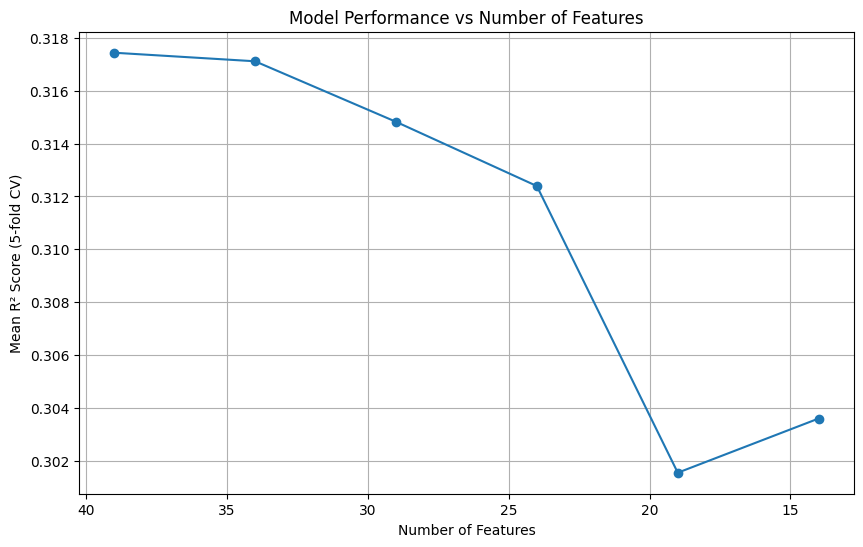

In [55]:
plt.figure(figsize=(10,6))
plt.plot(feature_counts, r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean R² Score (5-fold CV)')
plt.title('Model Performance vs Number of Features')
plt.gca().invert_xaxis()  # So plot shows from high to low features left to right
plt.grid(True)
plt.show()


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import r2_score
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"✅ Best Model R²: {r2:.4f}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
✅ Best Model R²: 0.3627


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())
